In [14]:
from model_dgcnn import DGCNN_cls
import torch

In [19]:
model = DGCNN_cls(k=20, emb_dims=1024, dropout=0.5, output_channels=40)
model = torch.nn.DataParallel(model)    
model = model.eval()
model.load_state_dict(torch.load("/home/akshay/Downloads/TAIT/dgcnn.pytorch/pretrained/model.cls.1024.t7"))

<All keys matched successfully>

In [20]:
for i, mod in enumerate(model.modules()):
    if i == 27:
        mod = torch.nn.Linear(256, 10)
        print(i, mod)

27 Linear(in_features=256, out_features=10, bias=True)


In [6]:
state = torch.load("/home/akshay/Downloads/TAIT/dgcnn.pytorch/pretrained/model.cls.1024.t7")

In [10]:
for mod in state.weights():
    print(mod)

AttributeError: 'collections.OrderedDict' object has no attribute 'weights'

In [1]:
from wandb
wandb.init(project="hgndbs")

AttributeError: module 'wandb' has no attribute 'init'

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from transforms import Normalize, PointSampler, RandomNoise, RandRotation_z, ToTensor
from dataset import PointCloudData
from model import PointNet
import open3d as o3d
from path import Path
import argparse
import sklearn
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from tqdm import tqdm
from utils import plot_class_wise_scores
import wandb

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
path = Path("ModelNet10")
test_dataset = PointCloudData(path, True, "test")

In [7]:
    inv_classes = {i: cat for cat, i in test_dataset.classes.items()};
    print(inv_classes)
    aas = np.random.randint(0, 10, (10))

{0: 'bathtub', 1: 'bed', 2: 'chair', 3: 'desk', 4: 'dresser', 5: 'monitor', 6: 'night_stand', 7: 'sofa', 8: 'table', 9: 'toilet'}


In [9]:
for aa, (key, val) in zip(aas, inv_classes.items()):
    print(val, aa)
data = [[label, val] for (label, (x, val)) in zip(aas, inv_classes.items())]

bathtub 9
bed 5
chair 6
desk 3
dresser 4
monitor 6
night_stand 6
sofa 4
table 6
toilet 2


In [11]:
import wandb

In [13]:
table = wandb.Table(data=data, columns = ["label", "value"])
wandb.log({"my_bar_chart_id" : wandb.plot.bar(table, "label", "value",
                               title="Custom Bar Chart")})

AttributeError: module 'wandb' has no attribute 'Table'

In [1]:
import matplotlib.pyplot as plt

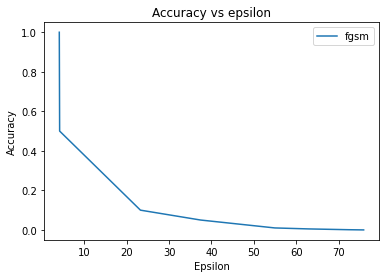

In [4]:
fig, ax = plt.subplots(1, 1)
a = [75.869, 72.447, 62.996, 54.943, 37.439, 23.258, 4.214, 4.133]
eps =  [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1] 
ax.plot(a, eps, label="fgsm")
ax.set_title("Accuracy vs epsilon")
ax.set_xlabel("Epsilon")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()